In [1]:
import sys
sys.path.append("/home/huaqingj/MyResearch/TVDN")

In [2]:
from pyTVDN import TVDNDetect
from pathlib import Path
from scipy.io import loadmat
import numpy as np
%matplotlib inline

In [3]:
resDir = Path("../results")
dataDir = Path("../data")

In [20]:
filname = Path("subj1.mat")
MEG = loadmat(dataDir/filname)["DK_timecourse"]

## Construct the TVDN Detection Class


- `saveDir` is the path to save the results, if upspecified, the results will not be saved.

- You can also specify the detection parameters manunally

In [21]:
MEGdet = TVDNDetect(Ymat=MEG, saveDir="../results", dataType="MEG", fName="subj1", r=6, kappa=2.95, freq=60)

The parameters for detection are:
{'Lmin': 60,
 'MaxM': 19,
 'T': 2,
 'decimateRate': 10,
 'downRate': 20,
 'fName': 'subj1',
 'fct': 0.5,
 'freq': 60,
 'is_detrend': False,
 'kappa': 2.95,
 'lamb': 0.0001,
 'plotfct': 30,
 'r': 6}


## Run the Main Function

In [22]:
MEGdet()

### Check the current results

In [23]:
print(MEGdet)

+-------------+----------------------------------------------------------+--------------------+------+
| Num of CPTs |                      Estiamted CPTs                      |        MSE         | Rank |
+-------------+----------------------------------------------------------+--------------------+------+
|      11     | [ 161  387  617 1013 1204 1550 1964 2179 2439 3212 3382] | 0.6178042433874334 |  6   |
+-------------+----------------------------------------------------------+--------------------+------+


## Tuning the kappa parameters

In [24]:
kappas = np.linspace(2.5, 3, 100)
MEGdet.TuningKappa(kappas)

### Then we  can check the best kappa parameters w.r.t mean square errors

In [25]:
print("The optimal kappas are:", MEGdet.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", MEGdet.optKappaOptNumChg)
print("The optimal number of change point is:", MEGdet.optNumChg)

The optimal kappas are: 2.570707070707071
The optimal number of change point under the range of kappa we speicified is: 18
The optimal number of change point is: 16


###  Update the estimated change point set based on optimal kappa

You can also specify the number of change points you want via providing the augment `numChg`, then the `UpdateEcpts` will update the current estimated change point set accordingly.

In such case, the `PlotXXX` function will plot the curves under the number of change point you provided

In [26]:
MEGdet.UpdateEcpts(numChg=12)
MEGdet.UpdateEcpts(numChg=11) # for MEG 1
#MEGdet.UpdateEcpts()

### Check the results after updating

In [27]:
print(MEGdet)

+-------------+---------------------------------------------------------------------+--------------------+------+
| Num of CPTs |                            Estiamted CPTs                           |        MSE         | Rank |
+-------------+---------------------------------------------------------------------+--------------------+------+
|      11     | [ 161.  387.  617. 1013. 1204. 1550. 1964. 2179. 2439. 3212. 3382.] | 0.6178042433874334 |  6   |
+-------------+---------------------------------------------------------------------+--------------------+------+


### Plot the detection results under the optimal kappa

 You may also specify the `saveFigPath` to save the figure


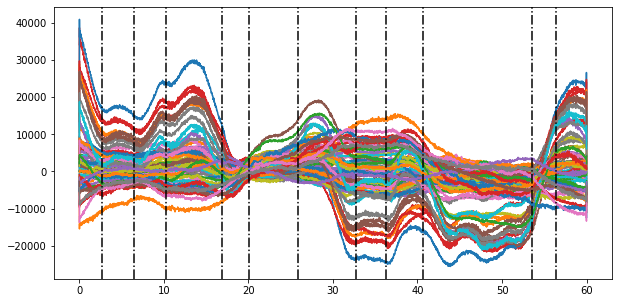

In [28]:
MEGdet.PlotEcpts(saveFigPath="detectionResults.jpg")

### Plot the reconstructed curve under the optimal kappa

 Similarly, you can specify the `saveFigPath` to save the figure
 
 You should specify the subsets of sequences you want to plot via `idxs` argument

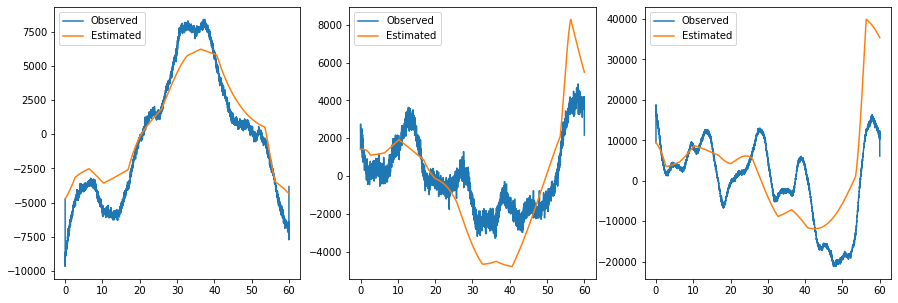

In [29]:
MEGdet.PlotRecCurve(idxs=[43, 45, 59], saveFigPath="recCurve.jpg")

### Plot the eigenvalue curve under the optimal kappa

 Similarly, you can specify the `saveFigPath` to save the figure

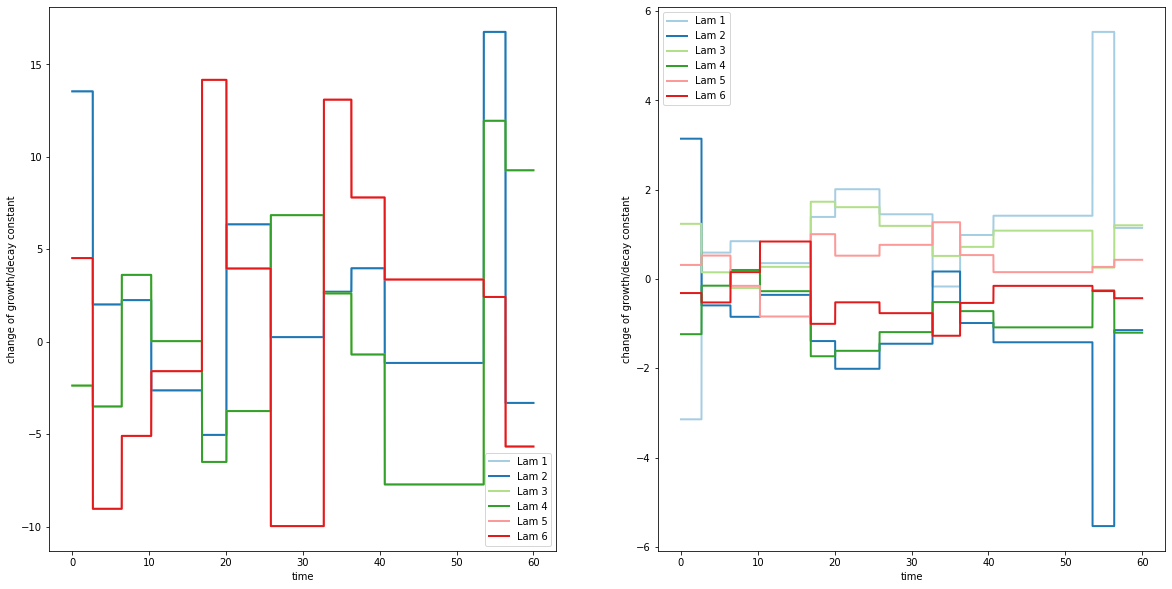

In [30]:
MEGdet.PlotEigenCurve()

### Results when number of changes is 0

In [31]:
MEGdet.UpdateEcpts(numChg=0)

In [32]:
print(MEGdet)

+-------------+----------------+--------------------+------+
| Num of CPTs | Estiamted CPTs |        MSE         | Rank |
+-------------+----------------+--------------------+------+
|      0      |       []       | 0.9194445561814828 |  6   |
+-------------+----------------+--------------------+------+


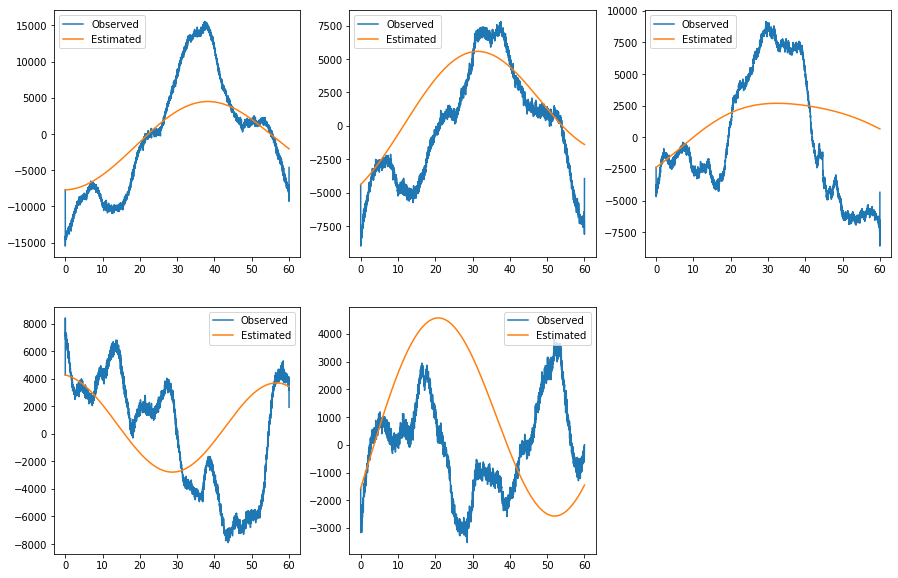

In [33]:
MEGdet.PlotRecCurve(saveFigPath="../plots/recCurve_MEG1.jpg")